<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [22]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [23]:
# Answer: 
movies.shape

(979, 6)

#### Check the data type of each column.

In [24]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [25]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [33]:
# Answer:
#Shortest Movie
print(movies.sort_values(by = ["duration"]).head(1)["title"])
#Longest Movie
print(movies.sort_values(by = ["duration"]).tail(1)["title"])

389    Freaks
Name: title, dtype: object
476    Hamlet
Name: title, dtype: object


#### Create a histogram of duration, choosing an "appropriate" number of bins.

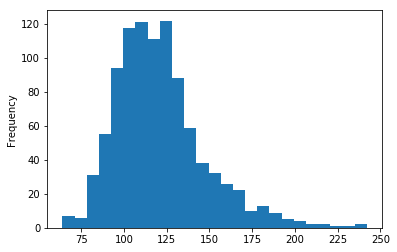

In [36]:
# Answer:
ax = movies.duration.plot.hist(bins = 25)
#bins = 25 seems appropriate to capture distribution of data

#### Use a box plot to display that same data.

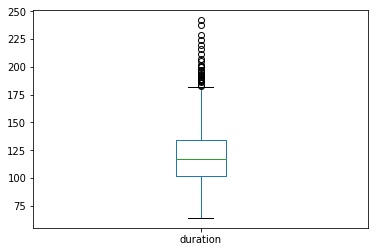

In [38]:
# Answer:
movies.duration.plot(kind = 'box', showfliers = True)

## Intermediate level

In [39]:
movies.head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."


#### Count how many movies have each of the content ratings.

In [40]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

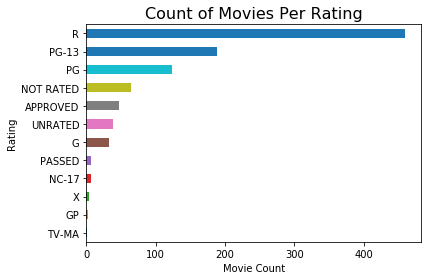

In [45]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts(ascending=True).plot(kind = 'barh')
ax.set_xlabel('Movie Count')
ax.set_ylabel('Rating')
ax.set_title('Count of Movies Per Rating',fontsize=16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [46]:
# Answer:
movies = movies.replace({"content_rating":{"NOT RATED":"UNRATED","APPROVED":"UNRATED","PASSED":"UNRATED","GP":"UNRATED"}})

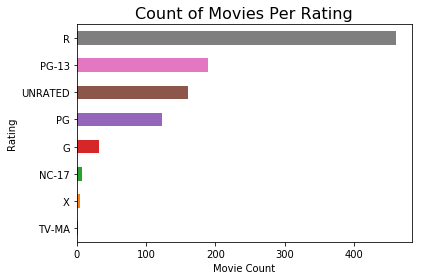

In [49]:
ax = movies.loc[:,'content_rating'].value_counts(ascending=True).plot(kind = 'barh')
ax.set_xlabel('Movie Count')
ax.set_ylabel('Rating')
ax.set_title('Count of Movies Per Rating',fontsize=16);

#### Convert the following content ratings to "NC-17": X, TV-MA.

Text(0.5,1,'Count of Movies Per Rating')

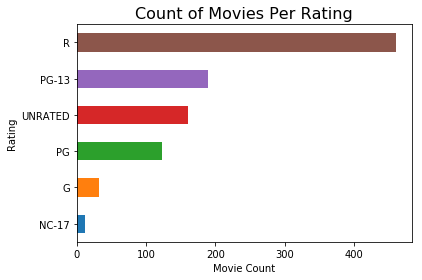

In [51]:
# Answer:
movies = movies.replace({"content_rating":{"X":"NC-17","TV-MA":"NC-17"}})
ax = movies.loc[:,'content_rating'].value_counts(ascending=True).plot(kind = 'barh')
ax.set_xlabel('Movie Count')
ax.set_ylabel('Rating')
ax.set_title('Count of Movies Per Rating',fontsize=16)

#### Count the number of missing values in each column.

In [52]:
# Answer:
movies.isnull().sum(axis = 0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [53]:
# Answer:
movies.loc[movies.content_rating.isnull(),:]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [54]:
movies.fillna("UNRATED",inplace = True)
movies.isnull().sum(axis = 0)

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [57]:
movies.head(1)

,star_rating,title,content_rating,genre,duration,actors_list,long_duration
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Shorter than 2 hours


In [58]:
# Answer:
#Boolean Mask of where duration is >= 160 minutes
two_hours_mask = movies.duration >= 160

#np.where to assign column values based on boolean mask
movies["long_duration"] = np.where(two_hours_mask,"2 hours or longer","Shorter than 2 hours")

#average star_rating for each each duration group
movies.groupby("long_duration")["star_rating"].mean()

long_duration
2 hours or longer       8.128235
Shorter than 2 hours    7.867114
Name: star_rating, dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

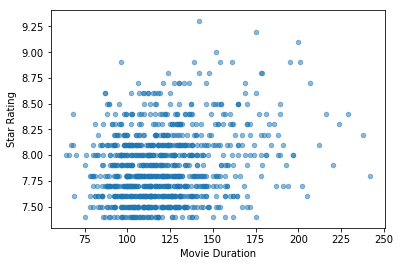

In [66]:
# Answer:
ax = movies.plot(kind = "scatter", x = "duration", y = "star_rating", alpha = .5);
ax.set_xlabel('Movie Duration');
ax.set_ylabel('Star Rating');

#no relationship between duration and star rating

In [67]:
movies.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [68]:
# Answer:
movies.groupby("genre")["duration"].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

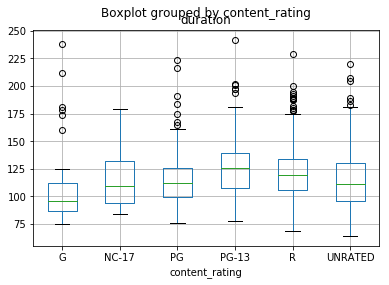

In [141]:
movies.boxplot(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [82]:
# Answer:
movies.groupby('genre',sort=False)[['star_rating',"title"]].max()

,star_rating,title
genre,,
Crime,9.3,Zodiac
Action,9.0,Yojimbo
Drama,8.9,Zulu
Western,8.9,Unforgiven
Adventure,8.9,True Grit
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Animation,8.6,Wreck-It Ralph
Mystery,8.6,Vertigo


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [83]:
'''
Answer:
not true duplicates
while movie year is not provided in the data, based on variation in actors list and duration, 
probably multiple productions of the same movie
'''

duplicate_titles = movies.duplicated(subset = "title", keep = False)
movies.loc[duplicate_titles,:].sort_values(by = "title")


,star_rating,title,content_rating,genre,duration,actors_list,long_duration
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",Shorter than 2 hours
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",Shorter than 2 hours
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",Shorter than 2 hours
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",Shorter than 2 hours
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",Shorter than 2 hours
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",Shorter than 2 hours
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",Shorter than 2 hours
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",Shorter than 2 hours


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [84]:
# Answer:
#Step 1: Locate genres with at least 10 movies using value_counts()
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [85]:
#Step 2: Manually create a list based on results of movies.genres.value_counts()
ten_movie_genres = ["Drama", "Comedy", "Action","Crime","Biography","Adventure","Animation","Horror","Mystery"]

In [86]:
#Step 3: Filter dataframe based on list of genres and get the average star rating for those genres
movies.loc[movies["genre"].isin(ten_movie_genres),:].groupby('genre')["star_rating"].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [99]:
# Answer:
genre_count = movies.genre.value_counts()
ten_movie_genres = genre_count.values > 10
movies.groupby('genre')['star_rating'].mean().loc[ten_movie_genres]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [100]:
# Answer:
movies.groupby('genre')['star_rating'].mean().loc[movies.genre.value_counts() > 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [128]:
# Answer:
movies.groupby('genre')['star_rating'].agg(['mean','count']).loc[groupby['count']>10,:]

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!